### Classification
    Car Insurance subcription prediction - We are trying to predict whether the client will subscribe to a car insurance

In [3]:
import sys
sys.path.append(r'C:\Users\oyinm\Downloads\All Python files\Dataset3\the_functions.py')

import pandas as pd

import warnings 
warnings.simplefilter("ignore")  

INSdata=pd.read_csv('carInsurance_train.csv') 
print(INSdata.shape)

INSdata.head().transpose() 

(4000, 19)


,0,1,2,3,4
Id,1,2,3,4,5
Age,32,32,29,25,30
Job,management,blue-collar,management,student,management
Marital,single,married,single,single,married
Education,tertiary,primary,tertiary,primary,tertiary
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
Communication,telephone,NaN,cellular,cellular,cellular


In [4]:
INSdata.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [5]:
#dropping irrelevant columns
INSdata=INSdata.drop(["Id", "Outcome"], axis = 1)
INSdata.head().transpose() 

,0,1,2,3,4
Age,32,32,29,25,30
Job,management,blue-collar,management,student,management
Marital,single,married,single,single,married
Education,tertiary,primary,tertiary,primary,tertiary
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
Communication,telephone,NaN,cellular,cellular,cellular
LastContactDay,28,26,3,11,3


In [6]:
#INSdata.dtypes 

In [7]:
#INSdata.nunique()

In [8]:
INSdata['CallDuration'] = (pd.to_datetime(INSdata['CallEnd']) - pd.to_datetime(INSdata['CallStart'])).apply(lambda x: x.seconds)

In [9]:
INSdata = INSdata.drop(['CallStart', 'CallEnd'], axis=1)

In [10]:
INSdata.head().transpose() 

,0,1,2,3,4
Age,32,32,29,25,30
Job,management,blue-collar,management,student,management
Marital,single,married,single,single,married
Education,tertiary,primary,tertiary,primary,tertiary
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
Communication,telephone,NaN,cellular,cellular,cellular
LastContactDay,28,26,3,11,3


In [11]:
# filling categorical missing values with column modes
for column in ['Job', 'Education', 'Communication']:
        INSdata[column] = INSdata[column].fillna(INSdata[column].mode()[0])

In [12]:
INSdata.head().transpose() 

,0,1,2,3,4
Age,32,32,29,25,30
Job,management,blue-collar,management,student,management
Marital,single,married,single,single,married
Education,tertiary,primary,tertiary,primary,tertiary
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
Communication,telephone,cellular,cellular,cellular,cellular
LastContactDay,28,26,3,11,3


In [13]:
INSdata.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CarInsurance        0
CallDuration        0
dtype: int64

In [14]:
#replacing values - changing categorical values it to numerical values

INSdata['Communication'] = INSdata['Communication'].replace({'telephone': 0, 'cellular': 1})
INSdata['Education'] = INSdata['Education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2})
INSdata['LastContactMonth'] = INSdata['LastContactMonth'].replace({'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8,'oct': 9, 'nov': 10, 'dec': 11})


In [15]:
INSdata = pd.concat([INSdata, pd.get_dummies(INSdata["Job"], prefix = "Job"), pd.get_dummies(INSdata["Marital"], prefix = "Marital")], axis = 1)

In [16]:
INSdata=INSdata.drop(["Job", "Marital"], axis = 1)

In [17]:
INSdata.head().transpose() 

,0,1,2,3,4
Age,32,32,29,25,30
Education,2,0,2,0,2
Default,0,0,0,0,0
Balance,1218,1156,637,373,2694
HHInsurance,1,1,1,1,0
CarLoan,0,0,0,0,0
Communication,0,1,1,1,1
LastContactDay,28,26,3,11,3
LastContactMonth,0,4,5,4,5
NoOfContacts,2,5,1,2,1


In [18]:
from the_functions import stratified_sample
X_train, X_test, y_train,y_test = stratified_sample(INSdata, 'Default', 0.8)

print('Class Distribution:', y_test.value_counts()/len(y_test))


Class Distribution: Default
0    0.985
1    0.015
Name: count, dtype: float64


In [19]:
#X_train = INSdata.drop(['CarInsurance'], axis = 1)  
#y_train = INSdata['CarInsurance']  

In [20]:
#y_train.value_counts()/len(y_train) 

#### Classification Tree


Classification tree accuracy for test set: 0.985

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       788
           1       0.00      0.00      0.00        12

    accuracy                           0.98       800
   macro avg       0.49      0.50      0.50       800
weighted avg       0.97      0.98      0.98       800


Feature Importance:



Balance              1.0
Age                  0.0
Job_blue-collar      0.0
Marital_married      0.0
Marital_divorced     0.0
Job_unemployed       0.0
Job_technician       0.0
Job_student          0.0
Job_services         0.0
Job_self-employed    0.0
Job_retired          0.0
Job_management       0.0
Job_housemaid        0.0
Job_entrepreneur     0.0
Job_admin.           0.0
Education            0.0
CallDuration         0.0
CarInsurance         0.0
PrevAttempts         0.0
DaysPassed           0.0
NoOfContacts         0.0
LastContactMonth     0.0
LastContactDay       0.0
Communication        0.0
CarLoan              0.0
HHInsurance          0.0
Marital_single       0.0
Name: feature_importances, dtype: float64

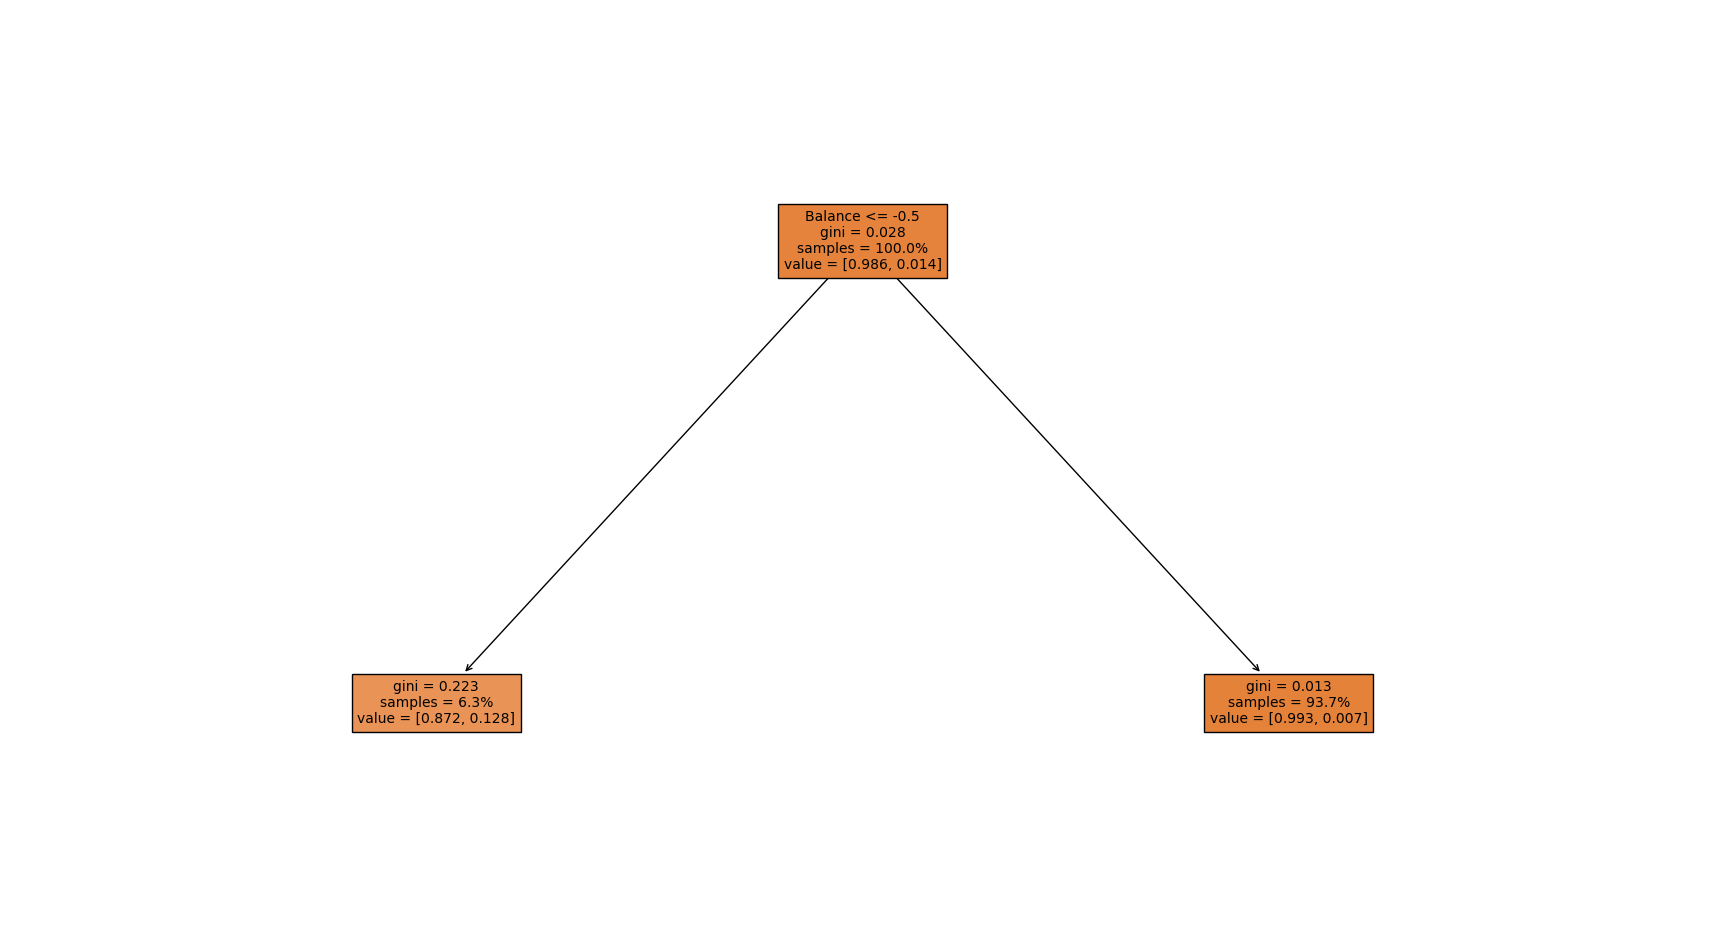

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt  
from sklearn.tree import export_text #Printing the tree in text

model = DecisionTreeClassifier() 
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]}) 
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)

print("Classification tree accuracy for test set:", dt.score(X_test, y_test)) 
print("\nClassification report:\n",classification_report(y_test, y_pred_dt))

result1 = pd.DataFrame(index=X_train.columns)
result1['feature_importances']=dt.best_estimator_.feature_importances_
print("\nFeature Importance:\n")
display(result1['feature_importances'].sort_values(ascending=False))

plt.subplots(figsize=(22, 12)) 
plot_tree(dt.best_estimator_, max_depth=3, feature_names=X_train.columns.tolist(), filled=True, proportion=True, fontsize=10) 
plt.show()

#### Classification -Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_log))
print('Intercept:',logreg.best_estimator_.intercept_)
print('\nCoefficients:\n',logreg.best_estimator_.coef_)
print(X_train.columns)

Logistic regression accuracy for test set: 0.985

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       788
           1       0.00      0.00      0.00        12

    accuracy                           0.98       800
   macro avg       0.49      0.50      0.50       800
weighted avg       0.97      0.98      0.98       800

Intercept: [-0.48623155]

Coefficients:
 [[-4.31558170e-02 -8.63200596e-01 -2.24962008e-03 -6.88086201e-01
   6.51403998e-01 -3.92595397e-01  6.87775968e-03  5.37423707e-02
  -2.26980370e-03  1.29158145e-03 -4.23557480e-01 -2.63214521e-01
   1.91259222e-04 -2.96073673e-01  1.66076005e-01  8.31823490e-02
   4.63336994e-02  8.11624118e-02  5.95068611e-02 -1.02723990e-01
  -2.19472934e-01 -1.93032100e-01 -1.91262233e-01  8.29803282e-02
  -1.28864483e-01  7.82150482e-02 -4.32673841e-01]]
Index(['Age', 'Education', 'Balance', 'HHInsurance', 'CarLoan',
       'Communication', 'LastContactDay', 'Las

#### Classification -- Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random forest accuracy for test set:", rf.score(X_test, y_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_rf))

Random forest accuracy for test set: 0.985

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       788
           1       0.00      0.00      0.00        12

    accuracy                           0.98       800
   macro avg       0.49      0.50      0.50       800
weighted avg       0.97      0.98      0.98       800



#### Discussion

#### This analysis aim to analyze existing customer characteristics with the hope that this predictive model can help to activate advertisements for customers interested in such car insurance. 
     Three models - Logistic Regression, Classification Tree and Random forest were built and the results compared. According to the result of this analysis, all 3 models had the same accuracy. 
     They all had an Accuracy of 0.985 (98.5%) and this represent the proportion of the correctly classified instances when compared to the total. All instances predicted as Class 0, 98% were correct.
     However, we noticed a poor performance on Class 1, the model failed to identify class 1 (positive). We could not get a good recall and the model could not identify positives.
     It can be drawn that the dataset is imbalanced as we noticed 788 instances of class 0 and only 12 instances of class 1.